In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
df=pd.read_csv(r"E:\Natural Language Processing\Dataset\spam_detection.csv",encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [13]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.columns=["catagory","message"]
df.head()

,catagory,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df["catagory"]=encoder.fit_transform(df["catagory"])
df.head()

,catagory,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
len(df["message"][0])

111

In [17]:
df["message_length"]=df["message"].apply(len)

# Text Preprocessing

In [21]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize

In [25]:
df["word_tokens"]=df["message"].apply([lambda x: len(word_tokenize(x))])
df["sent_tokens"]=df["message"].apply([lambda x: len(sent_tokenize(x))])

In [26]:
df.head()

,catagory,message,message_length,word_tokens,sent_tokens
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


([<matplotlib.patches.Wedge at 0x26daecc5a10>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'spam'),
  Text(1.0038714771419537, -0.44971330576360763, 'ham')])

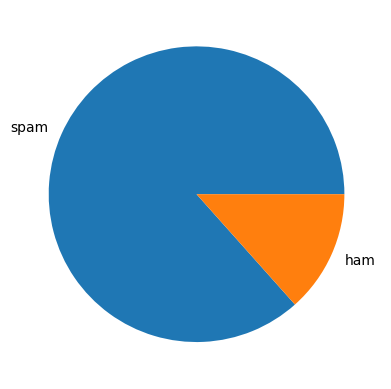

In [28]:
import matplotlib.pyplot as plt

plt.pie(df["catagory"].value_counts(),labels=["spam","ham"])

<Axes: xlabel='message_length', ylabel='Count'>

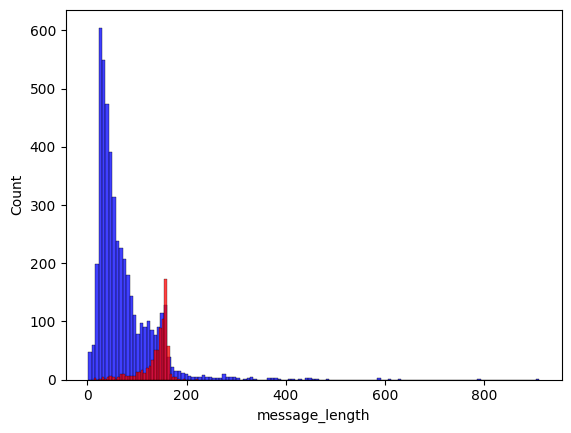

In [34]:
import seaborn as sns
sns.histplot(df[df["catagory"]==0]["message_length"],color="blue")
sns.histplot(df[df["catagory"]==1]["message_length"],color="red")

<Axes: xlabel='sent_tokens', ylabel='Count'>

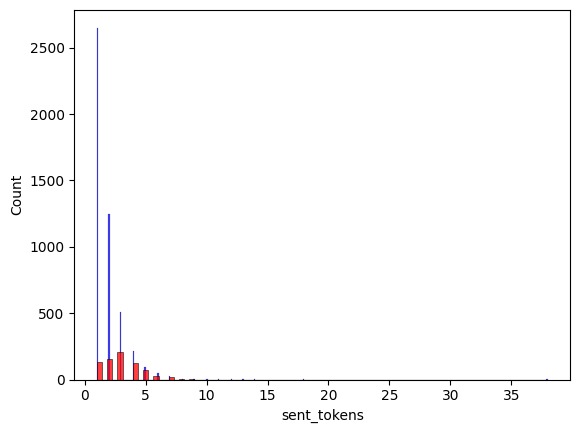

In [35]:
sns.histplot(df[df["catagory"]==0]["sent_tokens"],color="blue")
sns.histplot(df[df["catagory"]==1]["sent_tokens"],color="red")

<Axes: >

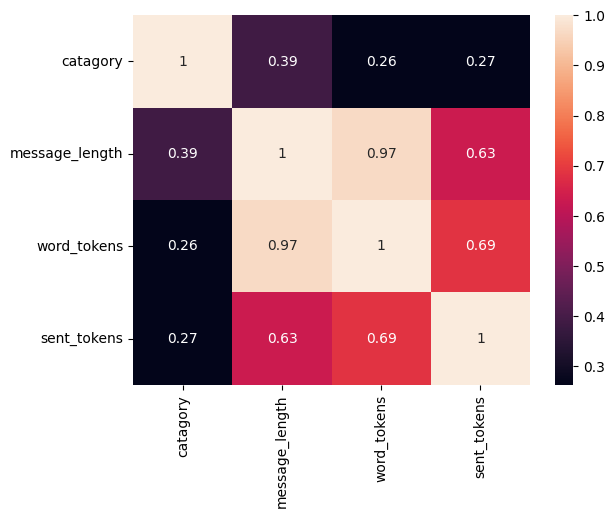

In [38]:
sns.heatmap(df.drop(columns=["message"]).corr(),annot=True)

# Text Preprocess

In [61]:
import spacy
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
from nltk import word_tokenize
import string

In [ ]:
stemmer=PorterStemmer()

doc=word_tokenize(df["message"][0])
doc2=[stemmer.stem(i) for i in doc if i not in stopwords.words("english")]

In [59]:
" ".join(doc2)

'go jurong point , crazi .. avail bugi n great world la e buffet ... cine got amor wat ...'

In [62]:
def preprocess_text(text):
    text=text.lower()
    text=text.translate(str.maketrans('','',string.punctuation))
    doc=word_tokenize(text)
    stemmed=[stemmer.stem(i) for i in doc if i not in stopwords.words("english")]

    converted=" ".join(stemmed)
    return converted


In [63]:
df["preprocessed"]=df["message"].apply(preprocess_text)

In [64]:
df.head()

,catagory,message,message_length,word_tokens,sent_tokens,preprocessed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)

X = tfidf.fit_transform(df["preprocessed"]).toarray() 
y=df["catagory"]

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.9772727272727273
